In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:

data_1=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_1.csv",skiprows =1,header=None)
data_2=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_1_2.csv",skiprows =1,header=None)
data_3=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_2.csv",skiprows =1,header=None)
data_4=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_2_2.csv",skiprows =1,header=None)
data_2

,0,1,2,3,4,5,6,7
0,0.100619,511629669,NaN,branches,2413708886,100.0,NaN,NaN
1,0.100619,835398225,NaN,L1-dcache-loads,2411699671,100.0,NaN,NaN
2,0.100619,436244833,NaN,L1-dcache-stores,2408995033,100.0,NaN,NaN
3,0.201059,358494692,NaN,branches,2415040247,100.0,NaN,NaN
4,0.201059,600661992,NaN,L1-dcache-loads,2414997806,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...
208,7.044450,332335716,NaN,L1-dcache-loads,2415399516,100.0,NaN,NaN
209,7.044450,109113789,NaN,L1-dcache-stores,2415375405,100.0,NaN,NaN
210,7.047680,6442132,NaN,branches,2382463880,100.0,NaN,NaN
211,7.047680,10809502,NaN,L1-dcache-loads,2382470998,100.0,NaN,NaN


In [14]:
def add_param_values(param_list,val):
    if param_list ==[]:
            param_list.append(val)
    else:
        param_list.append(param_list[-1]+row_1[i])
    return param_list

def delete_param_values(prev_list,cur_list):
    if len(cur_list)>len(prev_list):
        for i in range(0,(len(cur_list)-len(prev_list))):
            cur_list.pop()
    return cur_list

data_li=[data_1,data_3]
data_li_new=[data_2,data_4]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,1]
    time=data.iloc[:,0]
    time_li=[]
    instructions_li=[]
    page_faults_li=[]
    llc_load_misses_li=[]
    dtlb_load_misses_li=[]
    for i in range(0,len(row_1),4):
        instructions_li=add_param_values(instructions_li,row_1[i])
    for i in range(1,len(row_1),4):
        page_faults_li=add_param_values(page_faults_li,row_1[i])
    for i in range(2,len(row_1),4):
        llc_load_misses_li=add_param_values(llc_load_misses_li,row_1[i])
    for i in range(3,len(row_1),4):
        dtlb_load_misses_li=add_param_values(dtlb_load_misses_li,row_1[i])
    for i in range(0,len(time),4):
        time_li.append(time[i])
    data_dict[j]={"instructions":instructions_li,"page_faults":page_faults_li,
                    "llc_load_misses":llc_load_misses_li,"dtlb_load_misses":dtlb_load_misses_li, "time":time_li}
    j+=1

j=0
for data in data_li_new:
    row_1=data.iloc[:,1]
    time=data.iloc[:,0]
    time_li=[]
    branches_li=[]
    l1_dcache_loads_li=[]
    l1_dcache_store_li=[]
    for i in range(0,len(row_1),3):
        branches_li=add_param_values(branches_li,row_1[i])
    for i in range(1,len(row_1),3):
        l1_dcache_loads_li=add_param_values(l1_dcache_loads_li,row_1[i])
    for i in range(2,len(row_1),3):
        l1_dcache_store_li=add_param_values(l1_dcache_store_li,row_1[i])
    for i in range(0,len(time),3):
        time_li.append(time[i])
    branches_li=delete_param_values(data_dict[0]["instructions"], branches_li)
    l1_dcache_loads_li=delete_param_values(data_dict[0]["instructions"], l1_dcache_loads_li)
    l1_dcache_store_li=delete_param_values(data_dict[0]["instructions"], l1_dcache_store_li)
    time_li=delete_param_values(data_dict[0]["instructions"], time_li)
    
    data_dict[j].update({"branches":branches_li,"l1_dcache_loads":l1_dcache_loads_li,
                    "l1_dcache_store":l1_dcache_store_li, "time_new":time_li})
    j+=1

In [16]:
def normalize_list(list1,list2):
    if len(list1)>len(list2):
        for j in range(len(list2),len(list1)):
            list2.append(list2[-1])
    elif len(list2)>len(list1):
        for j in range(len(list1),len(list2)):
            list1.append(list1[-1])
    return list1,list2
data_dict[0]["instructions"],data_dict[1]["instructions"]= normalize_list(data_dict[0]["instructions"],data_dict[1]["instructions"])
data_dict[0]["page_faults"],data_dict[1]["page_faults"]= normalize_list(data_dict[0]["page_faults"],data_dict[1]["page_faults"])
data_dict[0]["llc_load_misses"],data_dict[1]["llc_load_misses"]= normalize_list(data_dict[0]["llc_load_misses"],data_dict[1]["llc_load_misses"])
data_dict[0]["dtlb_load_misses"],data_dict[1]["dtlb_load_misses"]= normalize_list(data_dict[0]["dtlb_load_misses"],data_dict[1]["dtlb_load_misses"])
data_dict[0]["time"],data_dict[1]["time"]= normalize_list(data_dict[0]["time"],data_dict[1]["time"])
data_dict[0]["branches"],data_dict[1]["branches"]= normalize_list(data_dict[0]["branches"],data_dict[1]["branches"])
data_dict[0]["l1_dcache_loads"],data_dict[1]["l1_dcache_loads"]= normalize_list(data_dict[0]["l1_dcache_loads"],data_dict[1]["l1_dcache_loads"])
data_dict[0]["l1_dcache_store"],data_dict[1]["l1_dcache_store"]= normalize_list(data_dict[0]["l1_dcache_store"],data_dict[1]["l1_dcache_store"])
data_dict[0]["time_new"],data_dict[1]["time_new"]= normalize_list(data_dict[0]["time_new"],data_dict[1]["time_new"])

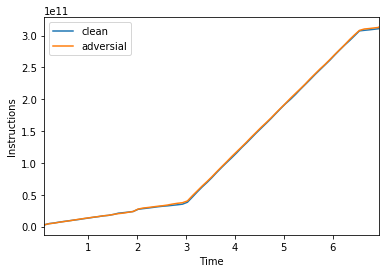

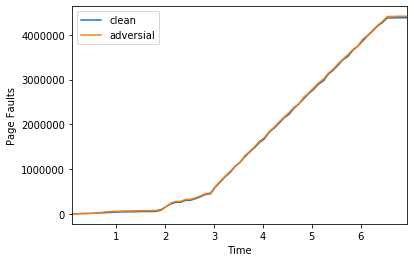

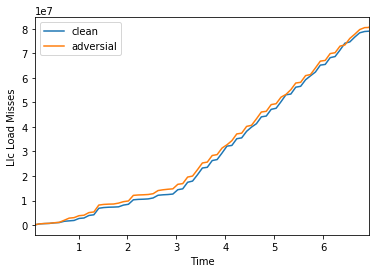

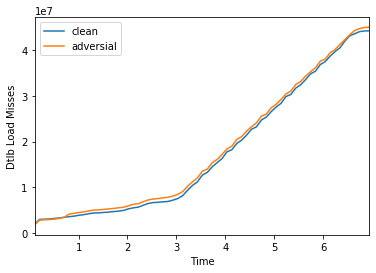

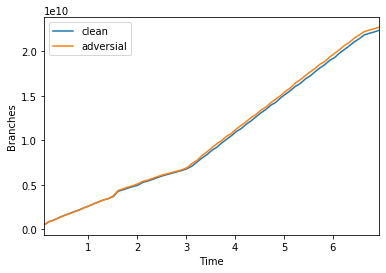

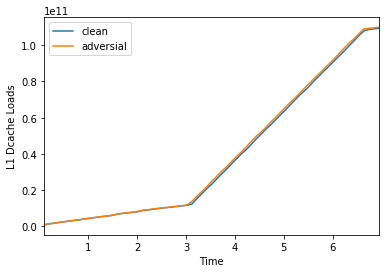

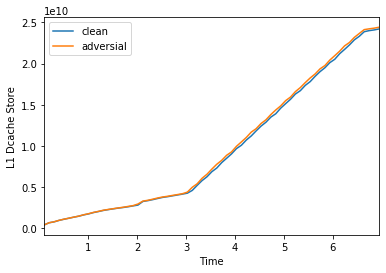

In [17]:
params_dict_keys=["instructions","page_faults","llc_load_misses","dtlb_load_misses","branches","l1_dcache_loads","l1_dcache_store"]
params=["Instructions","Page Faults","Llc Load Misses","Dtlb Load Misses","Branches","L1 Dcache Loads","L1 Dcache Store"]
for k in range(0,4):
    df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[k]],"adversial": data_dict[1][params_dict_keys[k]],
    }, index=data_dict[0]["time"])
    lines = df.plot.line()
    lines.set_xlabel("Time")
    lines.set_ylabel(params[k])
    lines.ticklabel_format(useOffset=False)

for k in range(4,7):
    df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[k]],"adversial": data_dict[1][params_dict_keys[k]],
    }, index=data_dict[0]["time_new"])
    lines = df.plot.line()
    lines.set_xlabel("Time")
    lines.set_ylabel(params[k])
    lines.ticklabel_format(useOffset=False)

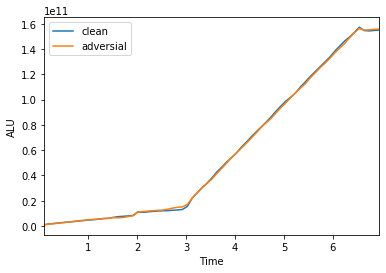

In [55]:
# ALU instructions:
import operator
sum_list=list(map(sum, zip(data_dict[0]["branches"],data_dict[0]["l1_dcache_loads"],data_dict[0]["l1_dcache_store"])))
clean_ALU=list(map(operator.sub, data_dict[0]["instructions"],sum_list))
sum_list=list(map(sum, zip(data_dict[1]["branches"],data_dict[1]["l1_dcache_loads"],data_dict[1]["l1_dcache_store"])))
adversarial_ALU=list(map(operator.sub, data_dict[1]["instructions"],sum_list))
df = pd.DataFrame({"clean": clean_ALU,"adversial": adversarial_ALU,}, index=data_dict[0]["time_new"])
lines = df.plot.line()
lines.set_xlabel("Time")
lines.set_ylabel("ALU")
lines.ticklabel_format(useOffset=False)

155888186119

511629669

835398225

In [50]:
len(clean_ALU)

69